In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv("/home/yash/Downloads/placement.csv")
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


<Axes: xlabel='placement_exam_marks', ylabel='Count'>

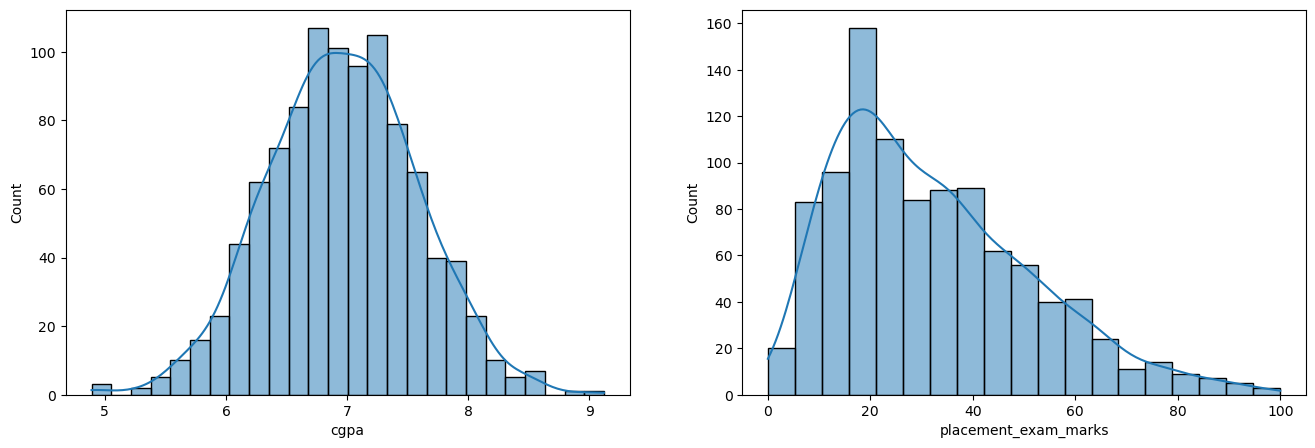

In [3]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.histplot(df["cgpa"],kde = True)
# cgpa is normally distributed 

plt.subplot(1,2,2)
sns.histplot(df["placement_exam_marks"],kde = True)
# placement_exam_marks is skew

In [4]:
print("placement_exam_marks Skew : ",df["placement_exam_marks"].skew())

placement_exam_marks Skew :  0.8356419499466834


In [5]:
df["placement_exam_marks"].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: xlabel='placement_exam_marks'>

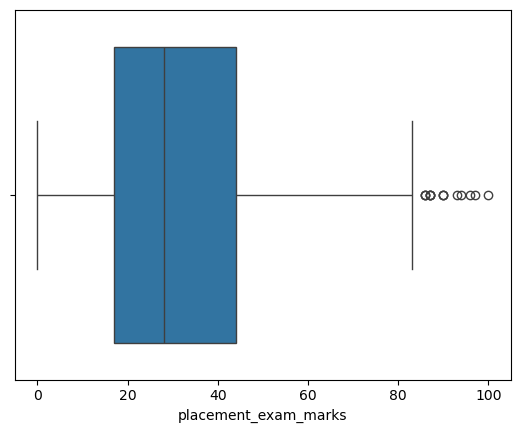

In [6]:
sns.boxplot(x = df["placement_exam_marks"])

In [7]:
percentile25 = df["placement_exam_marks"].quantile(0.25)
percentile75 = df["placement_exam_marks"].quantile(0.75)

In [8]:
print(" 25 Percentile :",percentile25,"\n","75 Percentile :",percentile75)

 25 Percentile : 17.0 
 75 Percentile : 44.0


In [9]:
iqr = percentile75 - percentile25
iqr

np.float64(27.0)

In [10]:
upper_lim = percentile75 + 1.5*iqr
lower_lim = percentile25 - 1.5*iqr

In [11]:
print(" upper_lim :",upper_lim,"\n","lower_lim :",lower_lim)

 upper_lim : 84.5 
 lower_lim : -23.5


In [12]:
# Find Outliers

df[(df["placement_exam_marks"] > upper_lim)].head()

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0


In [13]:
df[(df["placement_exam_marks"] > upper_lim)].shape

(15, 3)

In [14]:
df[(df["placement_exam_marks"] < lower_lim)].shape

(0, 3)

## 1.Triming

In [15]:
new_df_trm = df[(df["placement_exam_marks"] < upper_lim)]

In [16]:
new_df_trm.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [17]:
new_df_trm.shape

(985, 3)

<Axes: xlabel='placement_exam_marks'>

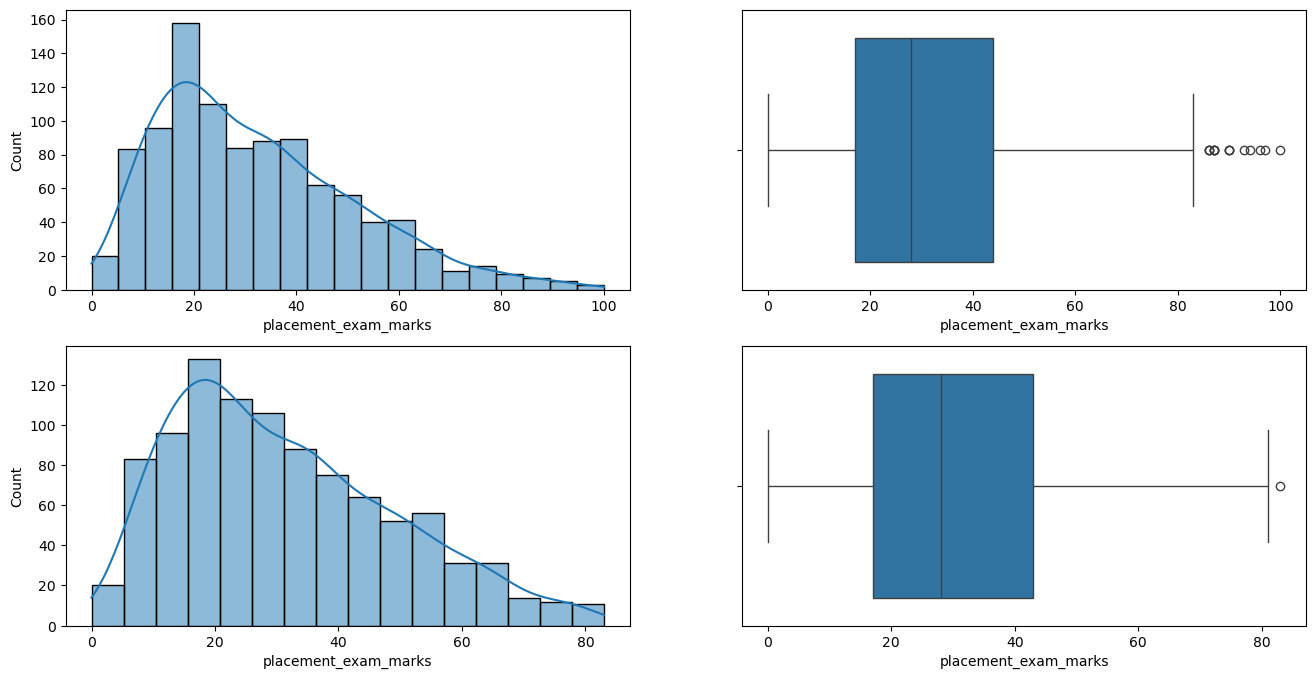

In [18]:
plt.figure(figsize = (16,8))

plt.subplot(2,2,1)
sns.histplot(df["placement_exam_marks"],kde = True)

plt.subplot(2,2,2)
sns.boxplot(x = df["placement_exam_marks"])

plt.subplot(2,2,3)
sns.histplot(new_df_trm["placement_exam_marks"],kde = True)

plt.subplot(2,2,4)
sns.boxplot(x = new_df_trm["placement_exam_marks"])

## 2.Caping

In [19]:
new_df_cap = df.copy()
new_df_cap["placement_exam_marks"] = np.where(new_df_cap["placement_exam_marks"] > upper_lim,
                                              upper_lim,
                                              new_df_cap["placement_exam_marks"])

In [20]:
new_df_cap.shape    

(1000, 3)

<Axes: xlabel='placement_exam_marks'>

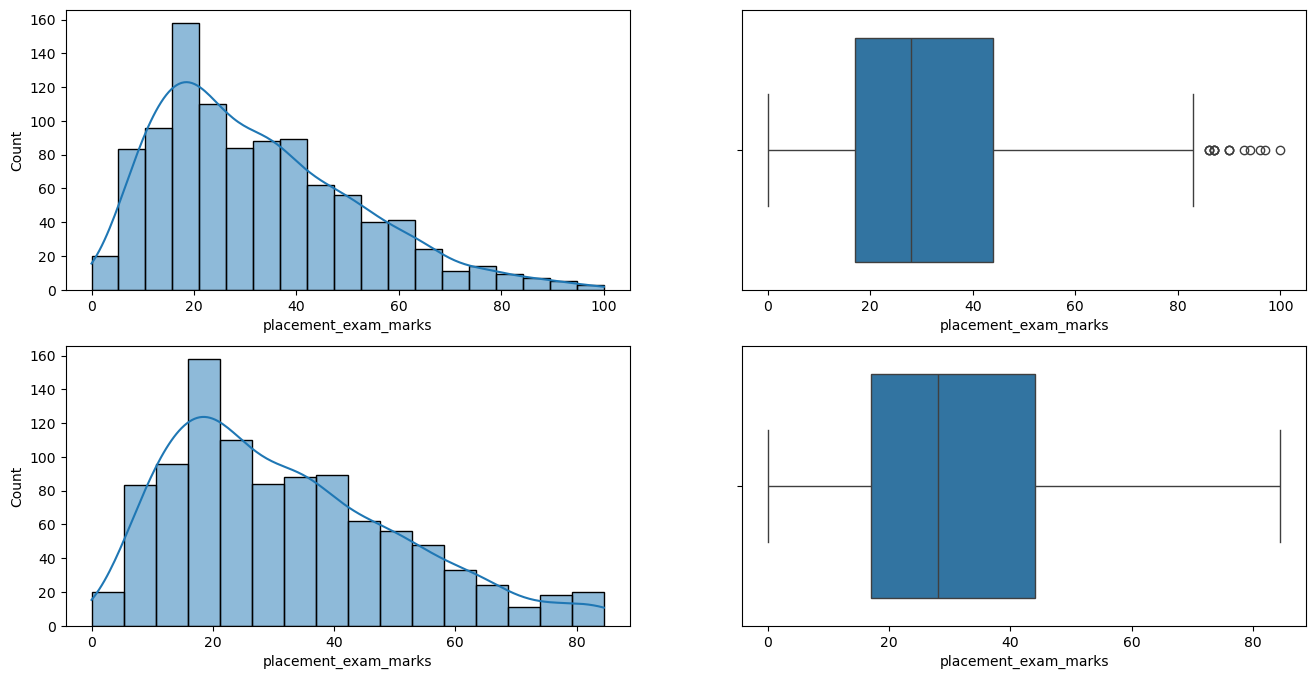

In [21]:
plt.figure(figsize = (16,8))

plt.subplot(2,2,1)
sns.histplot(df["placement_exam_marks"],kde = True)

plt.subplot(2,2,2)
sns.boxplot(x = df["placement_exam_marks"])

plt.subplot(2,2,3)
sns.histplot(new_df_cap["placement_exam_marks"],kde = True)

plt.subplot(2,2,4)
sns.boxplot(x = new_df_cap["placement_exam_marks"])